<a href="https://colab.research.google.com/github/honeyd3wy/bc_projects/blob/master/Section%201/2_EDA__3_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 아래의 코드를 실행 후 런타임 재시작
# !pip install scipy --upgrade

# 2. EDA(데이터 파악하기)

In [ ]:
import pandas as pd

url = 'https://docs.google.com/uc?export=download&id=1DVXmIbYfJ6UF6mrYt6AFbLh3gd7EE3Hk'
    # 1에서 수정한 파일을 업로드한 url입니다.

df = pd.read_csv(url)
df.drop('Unnamed: 0', axis=1, inplace=True)
df['Year'] = df['Year'].astype(str)

In [ ]:
# 경고 메세지 무시하기
import warnings
warnings.filterwarnings('ignore')

for i in range(len(df)):
     new = df['Year'][i].split('.')[0]
     df['Year'][i] = new

#### 🕹️ ***Data Description***

- `Name` : 게임의 이름입니다.
- `Platform` : 게임이 지원되는 플랫폼의 이름입니다.
- `Year` : 게임이 출시된 연도입니다.
- `Genre` : 게임의 장르입니다.
- `Publisher` : 게임을 제작한 회사입니다.
- `NA_Sales` : 북미지역에서의 출고량입니다.
- `EU_Sales` : 유럽지역에서의 출고량입니다.
- `JP_Sales` : 일본지역에서의 출고량입니다.
- `Other_Sales` : 기타지역에서의 출고량입니다.

In [ ]:
print("data shape: \n", df.shape)
print("\n")
print("data types: \n", df.dtypes)

data shape: 
 (16241, 9)


data types: 
 Name            object
Platform        object
Year            object
Genre           object
Publisher       object
NA_Sales       float64
EU_Sales       float64
JP_Sales       float64
Other_Sales    float64
dtype: object


# 3. 새로운 feature 만들기

In [ ]:
# 게임별 총 출고량 컬럼 만들기
df['total_sales'] = df['NA_Sales'] + df['EU_Sales'] + df['JP_Sales'] + df['Other_Sales']

# 4. 데이터 분석

In [ ]:
df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,total_sales
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,40000.0,0.0,0.0,0.0,40000.0
1,The Munchables,Wii,2009,Action,Namco Bandai Games,170000.0,0.0,0.0,10000.0,180000.0
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.0,0.0,20000.0,0.0,20000.0
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,40000.0,0.0,0.0,0.0,40000.0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,120000.0,90000.0,0.0,40000.0,250000.0
...,...,...,...,...,...,...,...,...,...,...
16236,Ice Age 2: The Meltdown,GC,2006,Platform,Vivendi Games,150000.0,40000.0,0.0,10000.0,200000.0
16237,Rainbow Islands: Revolution,PSP,2005,Action,Rising Star Games,10000.0,0.0,0.0,0.0,10000.0
16238,NBA 2K16,PS3,2015,Sports,Take-Two Interactive,440000.0,190000.0,30000.0,130000.0,790000.0
16239,Toukiden: The Age of Demons,PSV,2013,Action,Tecmo Koei,50000.0,50000.0,250000.0,30000.0,380000.0


In [ ]:
df['total_sales'].sum()

8755370000.0

In [ ]:
df.iloc[:,5:9].sum().sum()

8755370000.0

## 4.1. 가설검정

요약
- 출고량이 지역별/장르별/플랫폼별 차이가 통계적으로 유의하므로, 세 가지 요소로 게임 설계 전략을 짜볼 수 있다
- 또한 제작사별 차이도 유의하므로, 출고량이 많은 제작사의 전략을 분석해 볼 가치가 있다.

#### 1. 가설 설정: 출고량이 지역별로 차이가 있다고 할 수 있는가?
- $H_0$ : 미국.sum == 유럽.sum == 일본.sum == 다른국가.sum (지역별 차이가 없다.)
- $H_1$ : not $H_0$ (지역별 차이가 있다.)

In [ ]:
local_sum = [df['NA_Sales'].sum(), df['EU_Sales'].sum(), df['JP_Sales'].sum(), df['Other_Sales'].sum()]
df_local_sum = pd.DataFrame(local_sum, columns=['local_sum'])
df_local_sum.set_index([['NA','EU','JP','Other']], inplace=True)
df_local_sum

,local_sum
NA,4.307040e+09
EU,2.393570e+09
JP,1.271390e+09
Other,7.833700e+08


In [ ]:
# chi-shquare test
import scipy.stats as stats
stats.chisquare(df_local_sum['local_sum'], axis=None)

Power_divergenceResult(statistic=3355995708.3595552, pvalue=0.0)

p-value가 0이므로 reject $H_0$, 즉 지역별로 차이가 있다고 할 수 있다.

그러므로 지역별로 시장의 규모가 다르며, ***지역별로 분석하거나 전략을 세워도 무리가 없다***고 판단한다.

#### 2. 가설 설정: 출고량이 장르별로 차이가 있다고 할 수 있는가?
- $H_0$ : Action.sum == ... == Fighting.sum (장르별 차이가 없다.)
- $H_1$ : not $H_0$ (장르별 차이가 있다.)

In [ ]:
genre_sum = df.groupby('Genre').sum()['total_sales']

df_genre_sum = pd.DataFrame(genre_sum)
df_genre_sum.sort_values(by='total_sales',ascending=False)


,total_sales
Genre,
Action,1.712980e+09
Sports,1.305340e+09
Shooter,1.024750e+09
Role-Playing,9.015100e+08
Platform,8.279900e+08
Misc,7.797000e+08
Racing,7.225500e+08
Fighting,4.435400e+08
Simulation,3.892800e+08


In [ ]:
# chi-shquare test
import scipy.stats as stats
stats.chisquare(df_genre_sum['total_sales'], axis=None)

Power_divergenceResult(statistic=3316118325.3134933, pvalue=0.0)

p-value가 0.0이므로 reject $H_0$, 즉 장르별로 차이가 있다고 할 수 있다.

그러므로 지역별로 시장의 규모가 다르며, ***장르별로 분석하거나 전략을 세워도 무리가 없다***고 판단한다.

#### 3. 가설 설정: 출고량이 플랫폼별로 차이가 있다고 할 수 있는가?
- $H_0$ : DS.sum == ... == PS.sum (플랫폼별 차이가 없다.)
- $H_1$ : not $H_0$ (플랫폼별 차이가 있다.)

In [ ]:
platform_sum = df.groupby('Platform').sum()['total_sales']

df_platform_sum = pd.DataFrame(platform_sum)
df_platform_sum

,total_sales
Platform,
2600,8.598000e+07
3DO,1.000000e+05
3DS,2.318200e+08
DC,1.595000e+07
DS,8.171900e+08
GB,2.544300e+08
GBA,3.047600e+08
GC,1.960200e+08
GEN,2.835000e+07


In [ ]:
# chi-shquare test
import scipy.stats as stats
stats.chisquare(df_platform_sum['total_sales'], axis=None)

Power_divergenceResult(statistic=12695251903.04922, pvalue=0.0)

p-value가 0이므로 reject $H_0$, 즉 플랫폼별로 차이가 있다고 할 수 있다.

그러므로 지역별로 시장의 규모가 다르며, ***플랫폼별로 분석하거나 전략을 세워도 무리가 없다***고 판단한다.

#### 4. 가설 설정: 출고량이 제작사별로 차이가 있다고 할 수 있는가?
- $H_0$ : Destineer.sum == ... == Sony Computer Entertainment.sum (제작사별 차이가 없다.)
- $H_1$ : not $H_0$ (제작사별 차이가 있다.)

In [ ]:
publisher_sum = df.groupby('Publisher').sum()['total_sales']

df_publisher_sum = pd.DataFrame(publisher_sum)

In [ ]:
# chi-shquare test
import scipy.stats as stats
stats.chisquare(df_publisher_sum['total_sales'], axis=None)

Power_divergenceResult(statistic=392150712920.8246, pvalue=0.0)

p-value가 0이므로 reject $H_0$, 즉 제작사별로 차이가 있다고 할 수 있다.

그러므로 지역별로 시장의 규모가 다르며, ***출고량이 많은 제작사를 분석해 전략을 세워도 무리가 없다***고 판단한다.

#### 5. 가설 설정: 연도별로 게임 출고량의 차이가 있다고 할 수 있는가?

In [ ]:
year_sum = df.groupby('Year').sum()['total_sales']
df_year_sum = pd.DataFrame(year_sum)

# chi-shquare test
import scipy.stats as stats
stats.chisquare(df_year_sum['total_sales'], axis=None)

Power_divergenceResult(statistic=7508490904.096573, pvalue=0.0)

In [ ]:
df['Year'].unique()

array(['2008', '2009', '2010', '2005', '2011', '2007', '2001', '2003',
       '2006', '2014', '2015', '2002', '1997', '2013', '1996', '2004',
       '2000', '1984', '1998', '2016', '1985', '1999', '1995', '1993',
       '2012', '1987', '1982', '1994', '1990', '1992', '1991', '1983',
       '1988', '1981', '1989', '1986', '2017', '1980', '2020'],
      dtype=object)

p-value가 0이므로 reject $H_0$, 즉 연도별로 차이가 있다고 할 수 있다.

그러므로 ***연도별로 분석하는 것은 의미가 있다***고 판단한다.

## 4.2.Year - Genre pivot

- 연도별로 트렌드가 있는지 알아본다.

In [ ]:
df_pivot = df.pivot_table(index = 'Genre', columns = 'Year', values = 'total_sales', aggfunc='sum')
df_pivot.fillna(0, inplace=True)
years = df_pivot.columns.tolist()

df_pivot

Year,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2020
Genre,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Action,340000.0,14790000.0,6500000.0,2860000.0,1850000.0,3520000.0,13740000.0,1110000.0,1740000.0,4650000.0,6390000.0,6760000.0,3840000.0,1810000.0,1550000.0,3580000.0,20600000.0,27590000.0,39410000.0,27620000.0,33890000.0,56680000.0,86650000.0,67980000.0,76150000.0,85520000.0,66490000.0,105990000.0,135460000.0,138320000.0,117500000.0,119000000.0,120780000.0,125210000.0,99010000.0,68250000.0,19840000.0,10000.0,0.0
Adventure,0.0,0.0,0.0,400000.0,0.0,0.0,0.0,4380000.0,0.0,0.0,0.0,2240000.0,12240000.0,70000.0,3740000.0,710000.0,4180000.0,4970000.0,9040000.0,7610000.0,2960000.0,8960000.0,11070000.0,2120000.0,8450000.0,8530000.0,11480000.0,24440000.0,24910000.0,20670000.0,16570000.0,15880000.0,5900000.0,6610000.0,6090000.0,8010000.0,1790000.0,0.0,0.0
Fighting,770000.0,0.0,0.0,0.0,0.0,1050000.0,0.0,5420000.0,0.0,0.0,0.0,390000.0,15230000.0,8750000.0,8470000.0,14840000.0,18040000.0,11800000.0,31680000.0,14310000.0,20260000.0,18100000.0,24920000.0,23790000.0,16760000.0,19680000.0,22530000.0,17630000.0,35410000.0,32180000.0,14880000.0,22110000.0,9530000.0,7230000.0,16150000.0,7780000.0,3850000.0,0.0,0.0
Misc,2700000.0,0.0,870000.0,2140000.0,1450000.0,0.0,0.0,0.0,0.0,1280000.0,0.0,80000.0,4940000.0,300000.0,2860000.0,6390000.0,10660000.0,5680000.0,11840000.0,20680000.0,15550000.0,16390000.0,15630000.0,23790000.0,26100000.0,59690000.0,67230000.0,91070000.0,86180000.0,76900000.0,88400000.0,55770000.0,22930000.0,25660000.0,23730000.0,11660000.0,1150000.0,0.0,0.0
Platform,0.0,6920000.0,5030000.0,6930000.0,690000.0,43170000.0,9390000.0,1740000.0,27730000.0,20660000.0,22980000.0,7630000.0,13410000.0,18680000.0,28760000.0,16690000.0,28230000.0,21860000.0,29830000.0,20800000.0,16050000.0,39330000.0,45950000.0,42820000.0,47340000.0,22810000.0,49700000.0,35530000.0,35650000.0,40950000.0,31980000.0,28120000.0,18540000.0,25090000.0,8870000.0,6050000.0,2080000.0,0.0,0.0
Puzzle,0.0,2250000.0,10040000.0,780000.0,3140000.0,3210000.0,0.0,0.0,5580000.0,37750000.0,5990000.0,3240000.0,4840000.0,3170000.0,1530000.0,2690000.0,3920000.0,5870000.0,6350000.0,1340000.0,3830000.0,7940000.0,5330000.0,1710000.0,8410000.0,20260000.0,10790000.0,23780000.0,15530000.0,20280000.0,11150000.0,5100000.0,1740000.0,1000000.0,1500000.0,690000.0,0.0,0.0,0.0
Racing,0.0,480000.0,1570000.0,0.0,5950000.0,0.0,1960000.0,0.0,2140000.0,0.0,6250000.0,1140000.0,9050000.0,360000.0,2180000.0,6090000.0,27850000.0,31920000.0,26780000.0,37190000.0,20000000.0,55830000.0,30150000.0,52180000.0,45610000.0,56400000.0,34060000.0,38950000.0,70730000.0,34090000.0,34930000.0,34960000.0,14430000.0,13020000.0,16710000.0,7920000.0,1670000.0,0.0,0.0
Role-Playing,0.0,0.0,0.0,0.0,0.0,0.0,2520000.0,4650000.0,5880000.0,2200000.0,4520000.0,3260000.0,6860000.0,5590000.0,7130000.0,14270000.0,43990000.0,21820000.0,28090000.0,47240000.0,29040000.0,22020000.0,45090000.0,30290000.0,53950000.0,28510000.0,51790000.0,43860000.0,59690000.0,47960000.0,70560000.0,53320000.0,47770000.0,30540000.0,45880000.0,36430000.0,6750000.0,40000.0,0.0
Shooter,7070000.0,10020000.0,3810000.0,490000.0,31100000.0,1000000.0,3890000.0,690000.0,510000.0,1190000.0,0.0,1990000.0,280000.0,3080000.0,8300000.0,4150000.0,6900000.0,22160000.0,9800000.0,12230000.0,6830000.0,24810000.0,47640000.0,27100000.0,46920000.0,41570000.0,38350000.0,70880000.0,59510000.0,69840000.0,77440000.0,99350000.0,72840000.0,62730000.0,65990000.0,66120000.0,18170000.0,0.0,0.0


In [ ]:
df_pivot.sum().sum()

8755370000.0

In [ ]:
# year - genre 두 요인이 관련되어 출고량에 영향을 주는지 독립성 검정

from scipy import stats
hpy_df_pivot = df_pivot
hpy_df_pivot.dropna(inplace=True, axis=1)
stats.chi2_contingency(hpy_df_pivot)[1]

# p-value = 0, 따라서 두 요인은 연관이 있다.

0.0

In [ ]:
# 10년 간격으로 나누기
df_pivot.reset_index(inplace=True)
df_melt = df_pivot.melt(id_vars=['Genre'], value_vars=years)
df_melt.fillna(0, inplace=True)

In [ ]:
    # 1. 1980s
bigger_1980 = pd.to_numeric(df_melt['Year'])>=1980
smaller_1990 = pd.to_numeric(df_melt['Year'])<1990
df_1980s = df_melt[bigger_1980 & smaller_1990]
pv_df_1980s = df_1980s.pivot_table(index='Genre', columns='Year', values='value')
pv_df_1980s = pv_df_1980s.reindex(sorted(pv_df_1980s.columns, reverse=True), axis=1)

pv_df_1980s

Year,1989,1988,1987,1986,1985,1984,1983,1982,1981,1980
Genre,,,,,,,,,,
Action,4650000.0,1740000.0,1110000.0,13740000.0,3520000.0,1850000.0,2860000.0,6500000.0,14790000.0,340000.0
Adventure,0.0,0.0,4380000.0,0.0,0.0,0.0,400000.0,0.0,0.0,0.0
Fighting,0.0,0.0,5420000.0,0.0,1050000.0,0.0,0.0,0.0,0.0,770000.0
Misc,1280000.0,0.0,0.0,0.0,0.0,1450000.0,2140000.0,870000.0,0.0,2700000.0
Platform,20660000.0,27730000.0,1740000.0,9390000.0,43170000.0,690000.0,6930000.0,5030000.0,6920000.0,0.0
Puzzle,37750000.0,5580000.0,0.0,0.0,3210000.0,3140000.0,780000.0,10040000.0,2250000.0,0.0
Racing,0.0,2140000.0,0.0,1960000.0,0.0,5950000.0,0.0,1570000.0,480000.0,0.0
Role-Playing,2200000.0,5880000.0,4650000.0,2520000.0,0.0,0.0,0.0,0.0,0.0,0.0
Shooter,1190000.0,510000.0,690000.0,3890000.0,1000000.0,31100000.0,490000.0,3810000.0,10020000.0,7070000.0


In [ ]:
    # 2. 1990s
bigger_1990 = pd.to_numeric(df_melt['Year']) >= 1990
smaller_2000 = pd.to_numeric(df_melt['Year']) < 2000
df_1990s = df_melt[bigger_1990 & smaller_2000]
pv_df_1990s = df_1990s.pivot_table(index='Genre', columns='Year', values='value')
pv_df_1990s = pv_df_1990s.reindex(sorted(pv_df_1990s.columns, reverse=True), axis=1)

    # 3. 2000s
bigger_2000 = pd.to_numeric(df_melt['Year']) >= 2000
smaller_2010 = pd.to_numeric(df_melt['Year']) < 2010
df_2000s = df_melt[bigger_2000 & smaller_2010]
pv_df_2000s = df_2000s.pivot_table(index='Genre', columns='Year', values='value')
pv_df_2000s = pv_df_2000s.reindex(sorted(pv_df_2000s.columns, reverse=True), axis=1)


    # 4. 2010s
bigger_2010 = pd.to_numeric(df_melt['Year']) >= 2010
smaller_2020 = pd.to_numeric(df_melt['Year']) <= 2020
df_2010s = df_melt[bigger_2010 & smaller_2020]
pv_df_2010s = df_2010s.pivot_table(index='Genre', columns='Year', values='value')
pv_df_2010s = pv_df_2010s.reindex(sorted(pv_df_2010s.columns, reverse=True), axis=1)

Text(0, 0.5, 'Genre')

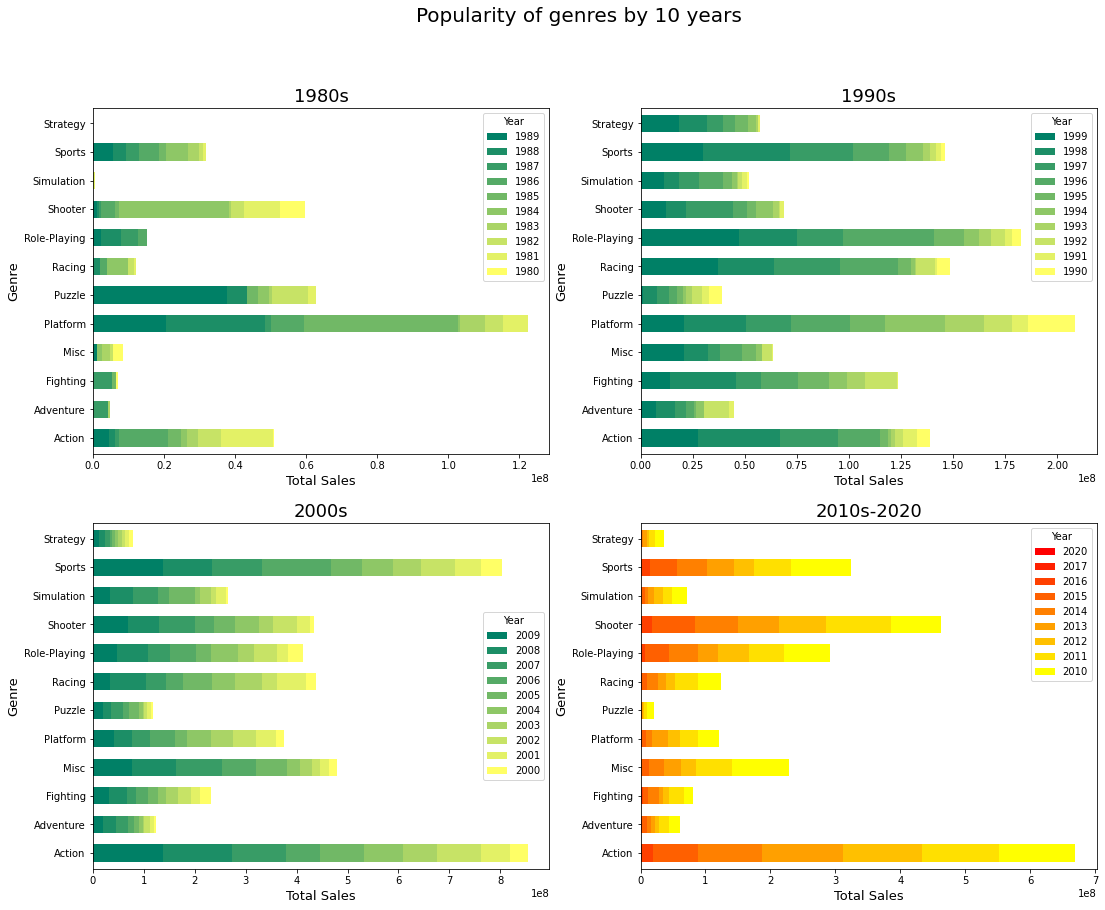

In [ ]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(18,14))
fig.suptitle('Popularity of genres by 10 years', fontsize=20)

ax1 = pv_df_1980s.plot(ax=axes[0,0],kind='barh', stacked=True, width=0.6, colormap='summer')
axes[0,0].set_title('1980s', fontsize=18)
axes[0,0].set_xlabel("Total Sales", fontsize=13)
axes[0,0].set_ylabel("Genre", fontsize=13)

ax2 = pv_df_1990s.plot(ax=axes[0,1],kind='barh', stacked=True, width=0.6, colormap='summer')
axes[0,1].set_title('1990s', fontsize=18)
axes[0,1].set_xlabel("Total Sales", fontsize=13)
axes[0,1].set_ylabel("Genre", fontsize=13)

ax3 = pv_df_2000s.plot(ax=axes[1,0],kind='barh', stacked=True, width=0.6, colormap='summer')
axes[1,0].set_title('2000s', fontsize=18)
axes[1,0].set_xlabel("Total Sales", fontsize=13)
axes[1,0].set_ylabel("Genre", fontsize=13)

ax4 = pv_df_2010s.plot(ax=axes[1,1],kind='barh', stacked=True, width=0.6, colormap='autumn')
axes[1,1].set_title('2010s-2020', fontsize=18)
axes[1,1].set_xlabel("Total Sales", fontsize=13)
axes[1,1].set_ylabel("Genre", fontsize=13)


## 4.3.Local sales - Genre

- 지역에 따른 장르 선호도가 있는지 알아본다.

In [ ]:
gen_local = df[['Genre','NA_Sales','EU_Sales','JP_Sales','Other_Sales']]
gen_local_df = gen_local.groupby('Genre').sum()
gen_local_df

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Genre,,,,
Action,858750000.0,513640000.0,156600000.0,183990000.0
Adventure,101790000.0,63660000.0,51870000.0,16700000.0
Fighting,220350000.0,99900000.0,87140000.0,36150000.0
Misc,394730000.0,208150000.0,104180000.0,72640000.0
Platform,445380000.0,200630000.0,130530000.0,51450000.0
Puzzle,121580000.0,50470000.0,56240000.0,12440000.0
Racing,354700000.0,235020000.0,56320000.0,76510000.0
Role-Playing,318760000.0,183090000.0,342930000.0,56730000.0
Shooter,574480000.0,310230000.0,38180000.0,101860000.0


In [ ]:
# 독립성 검정
from scipy import stats
stats.chi2_contingency(gen_local_df)[1]

# p-value = 0, 따라서 두 요인은 연관이 있다.

0.0

Text(0, 0.5, 'Genre')

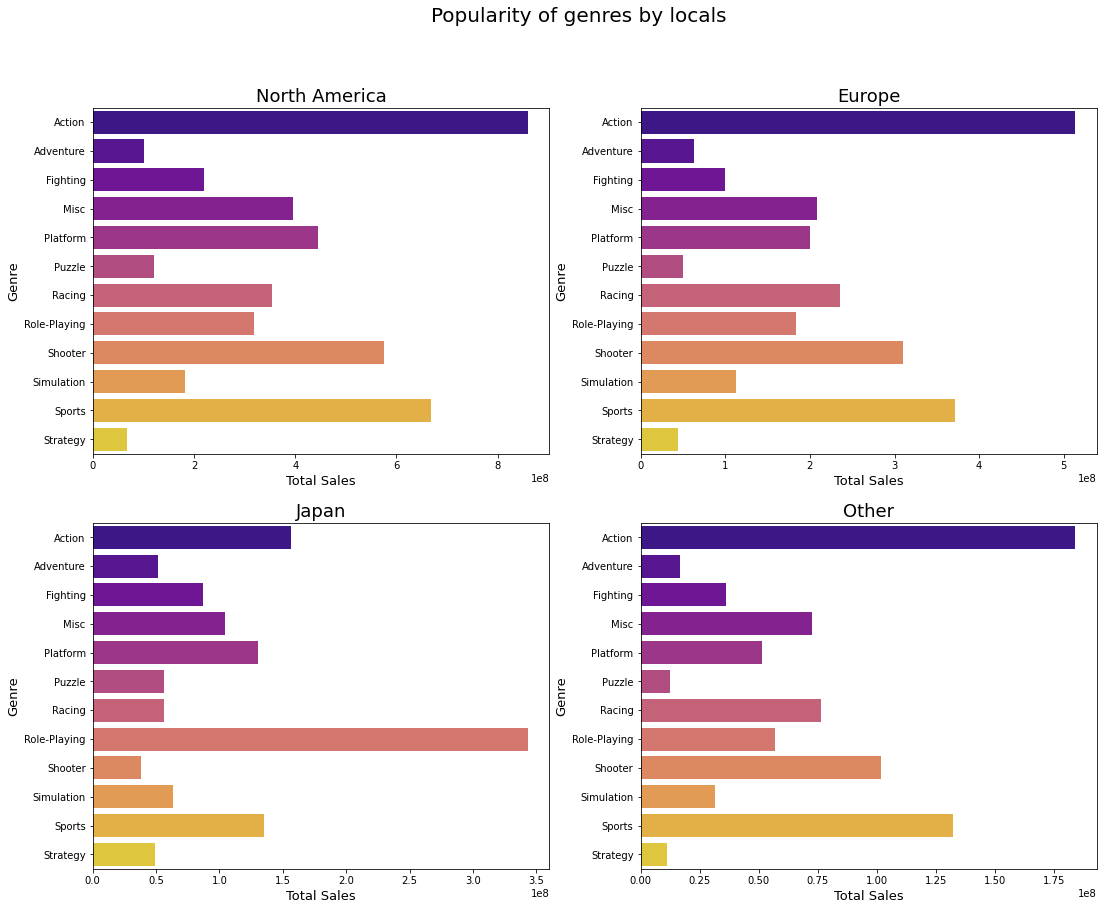

In [ ]:
# plot 작성
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
gen_local_df = gen_local_df.reset_index()

fig, axes = plt.subplots(2,2, figsize = (18, 14))
fig.suptitle('Popularity of genres by locals',fontsize=20)

sns.barplot(ax=axes[0,0], x='NA_Sales' , y='Genre', data=gen_local_df, palette='plasma');
axes[0,0].set_title('North America', fontsize=18)
axes[0,0].set_xlabel("Total Sales", fontsize=13)
axes[0,0].set_ylabel("Genre", fontsize=13)

sns.barplot(ax=axes[0,1], x='EU_Sales' , y='Genre', data=gen_local_df, palette='plasma');
axes[0,1].set_title('Europe', fontsize=18)
axes[0,1].set_xlabel("Total Sales", fontsize=13)
axes[0,1].set_ylabel("Genre", fontsize=13)

sns.barplot(ax=axes[1,0], x='JP_Sales' , y='Genre', data=gen_local_df, palette='plasma');
axes[1,0].set_title('Japan', fontsize=18)
axes[1,0].set_xlabel("Total Sales", fontsize=13)
axes[1,0].set_ylabel("Genre", fontsize=13)

sns.barplot(ax=axes[1,1], x='Other_Sales' , y='Genre', data=gen_local_df, palette='plasma');
axes[1,1].set_title('Other', fontsize=18)
axes[1,1].set_xlabel("Total Sales", fontsize=13)
axes[1,1].set_ylabel("Genre", fontsize=13)


In [ ]:
# 최근 10년 간 데이터
gen_local_10 = df[['Genre','Year','NA_Sales','EU_Sales','JP_Sales','Other_Sales']]
gen_local_10 = gen_local_10[pd.to_numeric(gen_local_10['Year']) >= 2010]
gen_local_10_df = gen_local_10.drop('Year',axis=1)
gen_local_10_df = gen_local_10_df.groupby('Genre').sum()
gen_local_10_df

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Genre,,,,
Action,286400000.0,234990000.0,70380000.0,77830000.0
Adventure,20640000.0,19070000.0,15300000.0,5840000.0
Fighting,38560000.0,20770000.0,13750000.0,8450000.0
Misc,123230000.0,64420000.0,21450000.0,20200000.0
Platform,55470000.0,38670000.0,15750000.0,10840000.0
Puzzle,9390000.0,6770000.0,3400000.0,1620000.0
Racing,45620000.0,55510000.0,6650000.0,15860000.0
Role-Playing,102400000.0,69700000.0,96100000.0,23090000.0
Shooter,227630000.0,166440000.0,13540000.0,55030000.0


In [ ]:
# 독립성 검정
from scipy import stats
stats.chi2_contingency(gen_local_10_df)[1]

# p-value = 0, 따라서 두 요인은 연관이 있다.

0.0

Text(0, 0.5, 'Genre')

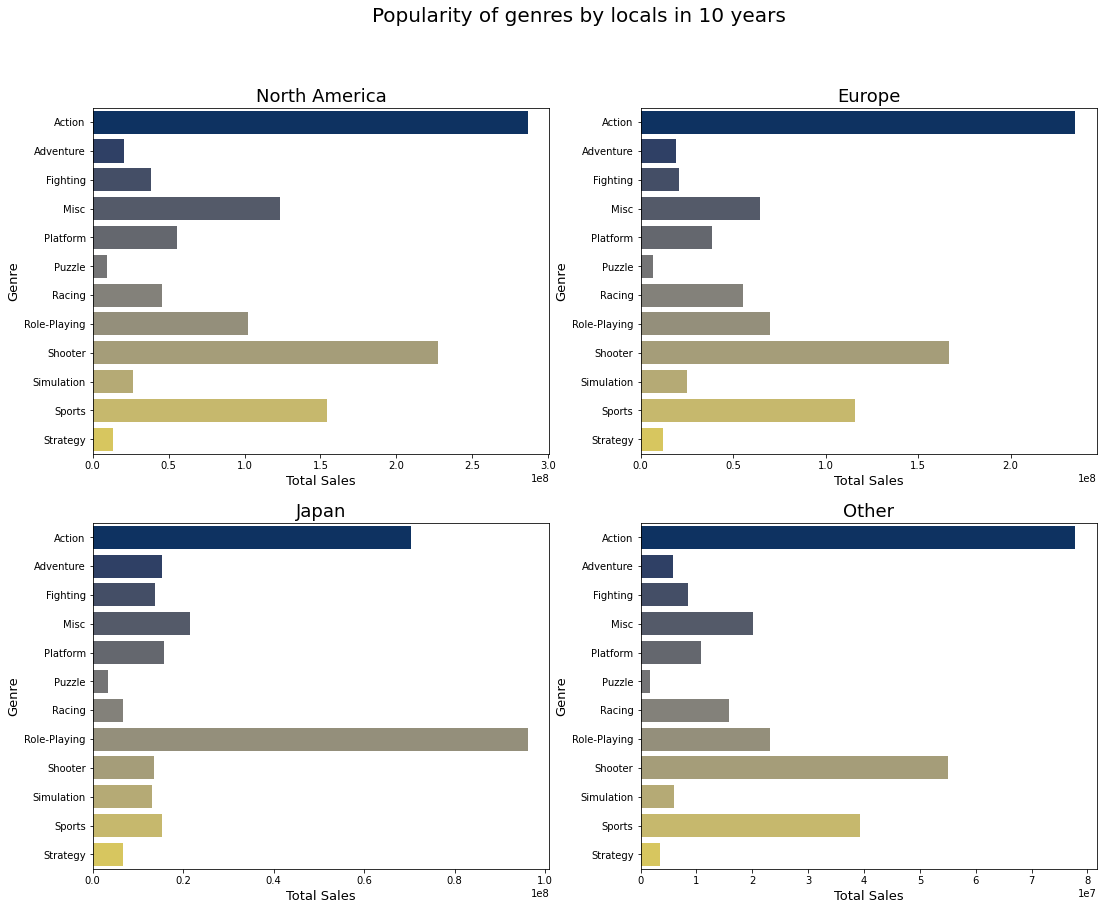

In [ ]:
# plot 작성
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
gen_local_10_df.reset_index(inplace=True)

fig, axes = plt.subplots(2,2, figsize = (18, 14))
fig.suptitle('Popularity of genres by locals in 10 years', fontsize=20)

sns.barplot(ax=axes[0,0], x='NA_Sales' , y='Genre', data=gen_local_10_df, palette='cividis');
axes[0,0].set_title('North America', fontsize=18)
axes[0,0].set_xlabel("Total Sales", fontsize=13)
axes[0,0].set_ylabel("Genre", fontsize=13)

sns.barplot(ax=axes[0,1], x='EU_Sales' , y='Genre', data=gen_local_10_df, palette='cividis');
axes[0,1].set_title('Europe', fontsize=18)
axes[0,1].set_xlabel("Total Sales", fontsize=13)
axes[0,1].set_ylabel("Genre", fontsize=13)

sns.barplot(ax=axes[1,0], x='JP_Sales' , y='Genre', data=gen_local_10_df, palette='cividis');
axes[1,0].set_title('Japan', fontsize=18)
axes[1,0].set_xlabel("Total Sales", fontsize=13)
axes[1,0].set_ylabel("Genre", fontsize=13)

sns.barplot(ax=axes[1,1], x='Other_Sales' , y='Genre', data=gen_local_10_df, palette='cividis');
axes[1,1].set_title('Other', fontsize=18)
axes[1,1].set_xlabel("Total Sales", fontsize=13)
axes[1,1].set_ylabel("Genre", fontsize=13)


Text(0, 0.5, 'Genre')

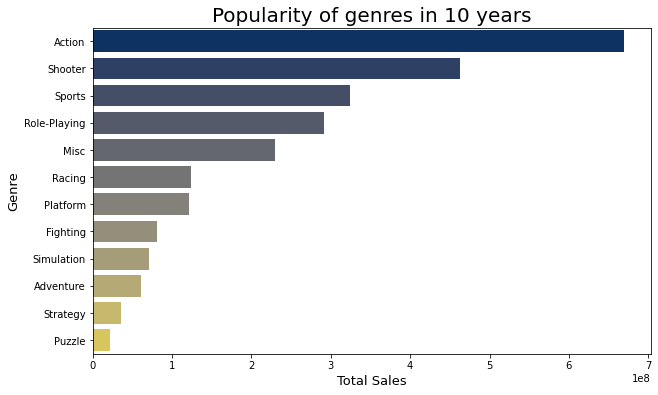

In [ ]:
gen_local_10_df['total_sales'] = gen_local_10_df['NA_Sales'] + gen_local_10_df['EU_Sales'] +gen_local_10_df['JP_Sales'] + gen_local_10_df['Other_Sales']
gen_local_10_df.sort_values(by='total_sales',ascending=False, inplace=True)
plt.figure(figsize=(10,6))

sns.barplot(x='total_sales' , y='Genre', data=gen_local_10_df, palette='cividis');
plt.title('Popularity of genres in 10 years', fontsize=20)
plt.xlabel("Total Sales",fontsize=13)
plt.ylabel("Genre",fontsize=13)



## 4.4. Year - Platform

- 시대별로 유행하는 platform을 알아본다.

In [ ]:
year_platform = df[['Platform', 'Year', 'total_sales']]
pv_year_platform = year_platform.pivot_table(index = 'Platform', columns = 'Year', values = 'total_sales', aggfunc='sum')
pv_year_platform.fillna(0, inplace=True)
pv_year_platform.head()

Year,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2020
Platform,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2600,10880000.0,35680000.0,28880000.0,5840000.0,270000.0,450000.0,670000.0,1940000.0,740000.0,630000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3DO,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20000.0,80000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3DS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,62580000.0,51100000.0,41510000.0,43110000.0,26970000.0,6550000.0,0.0,0.0
DC,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3380000.0,5160000.0,5990000.0,1070000.0,290000.0,0.0,0.0,0.0,0.0,20000.0,40000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
DS,0.0,0.0,0.0,0.0,0.0,20000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17410000.0,131150000.0,121000000.0,149020000.0,147120000.0,121870000.0,88020000.0,27760000.0,11550000.0,1960000.0,20000.0,0.0,0.0,0.0,290000.0


In [ ]:
# year - platform 두 요인이 관련되어 출고량에 영향을 주는지 독립성 검정

from scipy import stats
stats.chi2_contingency(pv_year_platform)[1]

# p-value = 0, 따라서 두 요인은 연관이 있다.

0.0

In [ ]:
# 10년 간격으로 나누기
pv_year_platform.reset_index(inplace=True)
melt_year_platform = pv_year_platform.melt(id_vars=['Platform'], value_vars=years)
melt_year_platform.fillna(0, inplace=True)

    # 1. 1980s
bigger_1980 = pd.to_numeric(melt_year_platform['Year'])>=1980
smaller_1990 = pd.to_numeric(melt_year_platform['Year'])<1990
y_p_1980s = melt_year_platform[bigger_1980 & smaller_1990]
df_y_p_1980s = y_p_1980s.pivot_table(index='Platform', columns='Year', values='value')
df_y_p_1980s = df_y_p_1980s.reindex(sorted(df_y_p_1980s.columns, reverse=True), axis=1)

df_y_p_1980s.head()

Year,1989,1988,1987,1986,1985,1984,1983,1982,1981,1980
Platform,,,,,,,,,,
2600,630000.0,740000.0,1940000.0,670000.0,450000.0,270000.0,5840000.0,28880000.0,35680000.0,10880000.0
3DO,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3DS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
DC,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
DS,0.0,0.0,0.0,0.0,20000.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
    # 2. 1990s
bigger_1990 = pd.to_numeric(melt_year_platform['Year'])>=1990
smaller_2000 = pd.to_numeric(melt_year_platform['Year'])<2000
y_p_1990s = melt_year_platform[bigger_1990 & smaller_2000]
df_y_p_1990s = y_p_1990s.pivot_table(index='Platform', columns='Year', values='value')
df_y_p_1990s = df_y_p_1990s.reindex(sorted(df_y_p_1990s.columns, reverse=True), axis=1)
df_y_p_1990s.head()

Year,1999,1998,1997,1996,1995,1994,1993,1992,1991,1990
Platform,,,,,,,,,,
2600,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3DO,0.0,0.0,0.0,0.0,80000.0,20000.0,0.0,0.0,0.0,0.0
3DS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
DC,5160000.0,3380000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
DS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
    # 3. 2000s
bigger_2000 = pd.to_numeric(melt_year_platform['Year'])>=2000
smaller_2010 = pd.to_numeric(melt_year_platform['Year'])<2010
y_p_2000s = melt_year_platform[bigger_2000 & smaller_2010]
df_y_p_2000s = y_p_2000s.pivot_table(index='Platform', columns='Year', values='value')
df_y_p_2000s = df_y_p_2000s.reindex(sorted(df_y_p_2000s.columns, reverse=True), axis=1)
df_y_p_2000s.head()

Year,2009,2008,2007,2006,2005,2004,2003,2002,2001,2000
Platform,,,,,,,,,,
2600,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3DO,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3DS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
DC,0.0,40000.0,20000.0,0.0,0.0,0.0,0.0,290000.0,1070000.0,5990000.0
DS,121870000.0,147120000.0,149020000.0,121000000.0,131150000.0,17410000.0,0.0,0.0,0.0,0.0


In [ ]:
    # 3. 2010s-2020
bigger_2010 = pd.to_numeric(melt_year_platform['Year'])>=2010
smaller_2020 = pd.to_numeric(melt_year_platform['Year'])<=2020
y_p_2010s = melt_year_platform[bigger_2010 & smaller_2020]
df_y_p_2010s = y_p_2010s.pivot_table(index='Platform', columns='Year', values='value')
df_y_p_2010s = df_y_p_2010s.reindex(sorted(df_y_p_2010s.columns, reverse=True), axis=1)
df_y_p_2010s.head()

Year,2020,2017,2016,2015,2014,2013,2012,2011,2010
Platform,,,,,,,,,
2600,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3DO,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3DS,0.0,0.0,6550000.0,26970000.0,43110000.0,41510000.0,51100000.0,62580000.0,0.0
DC,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
DS,290000.0,0.0,0.0,0.0,20000.0,1960000.0,11550000.0,27760000.0,88020000.0


Text(0, 0.5, 'Platform')

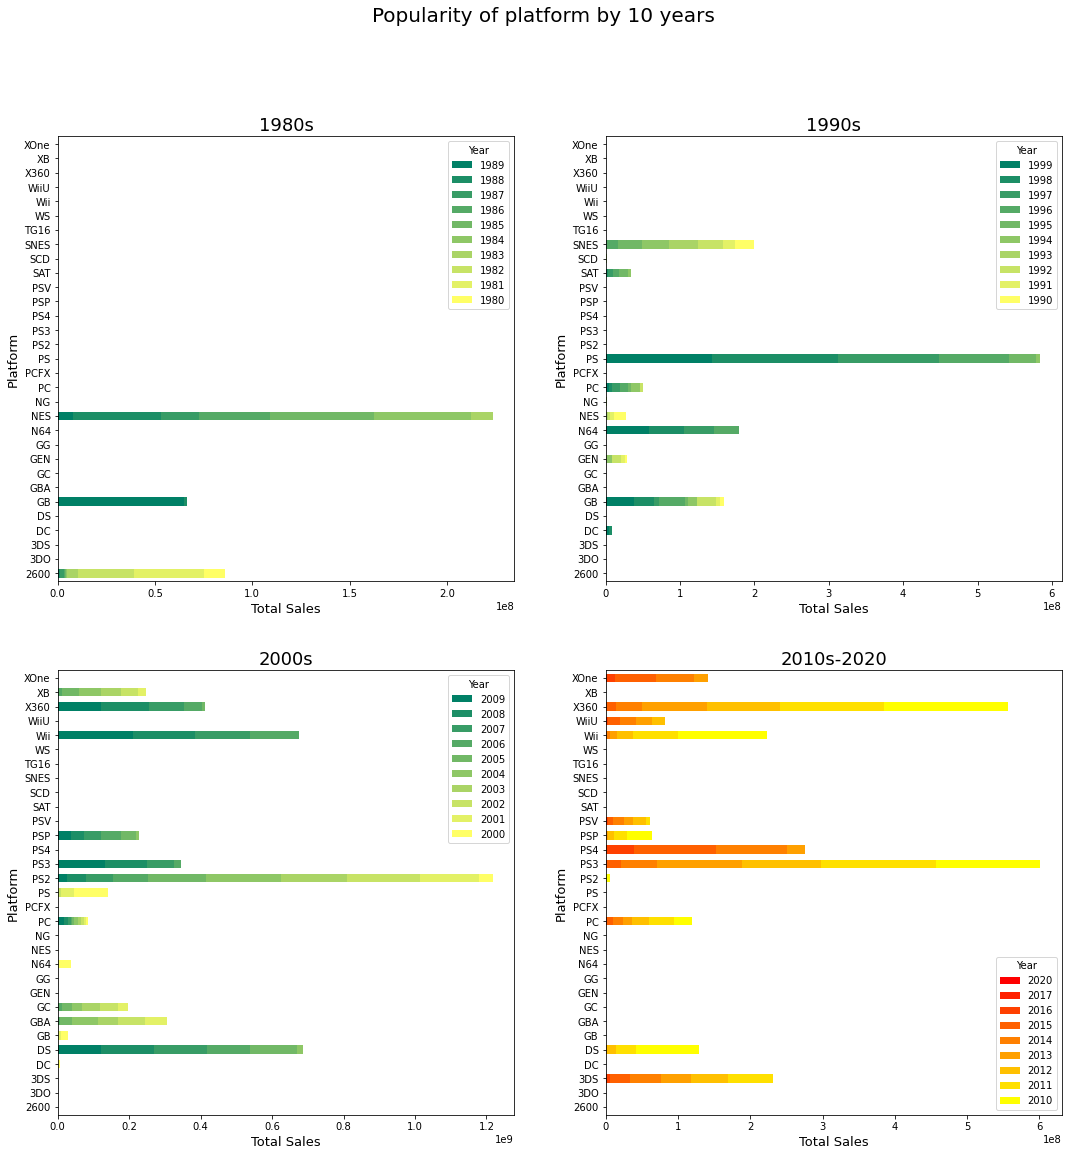

In [ ]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(18,18))
fig.suptitle('Popularity of platform by 10 years', fontsize=20)

ax_1 = df_y_p_1980s.plot(ax=axes[0,0],kind='barh', stacked=True, width=0.6, colormap='summer')
axes[0,0].set_title('1980s', fontsize=18)
axes[0,0].set_xlabel("Total Sales", fontsize=13)
axes[0,0].set_ylabel("Platform", fontsize=13)

ax_2 = df_y_p_1990s.plot(ax=axes[0,1],kind='barh', stacked=True, width=0.6, colormap='summer')
axes[0,1].set_title('1990s', fontsize=18)
axes[0,1].set_xlabel("Total Sales", fontsize=13)
axes[0,1].set_ylabel("Platform", fontsize=13)

ax_3 = df_y_p_2000s.plot(ax=axes[1,0],kind='barh', stacked=True, width=0.6, colormap='summer')
axes[1,0].set_title('2000s', fontsize=18)
axes[1,0].set_xlabel("Total Sales", fontsize=13)
axes[1,0].set_ylabel("Platform", fontsize=13)

ax_4 = df_y_p_2010s.plot(ax=axes[1,1],kind='barh', stacked=True, width=0.6, colormap='autumn')
axes[1,1].set_title('2010s-2020', fontsize=18)
axes[1,1].set_xlabel("Total Sales", fontsize=13)
axes[1,1].set_ylabel("Platform", fontsize=13)


2010년대 데이터를 자세히 보자.

In [ ]:
new_y_p_2010s = df_y_p_2010s[df_y_p_2010s != 0].dropna(how='all')
new_y_p_2010s

Year,2020,2017,2016,2015,2014,2013,2012,2011,2010
Platform,,,,,,,,,
3DS,NaN,NaN,6550000.0,26970000.0,43110000.0,41510000.0,51100000.0,62580000.0,NaN
DS,290000.0,NaN,NaN,NaN,20000.0,1960000.0,11550000.0,27760000.0,88020000.0
PC,NaN,NaN,2600000.0,8030000.0,13330000.0,12800000.0,23500000.0,35000000.0,24220000.0
PS2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,450000.0,5120000.0
PS3,NaN,NaN,2550000.0,18180000.0,50970000.0,117420000.0,108320000.0,159370000.0,144380000.0
PS4,NaN,30000.0,39300000.0,112860000.0,98830000.0,24760000.0,NaN,NaN,NaN
PSP,NaN,NaN,NaN,120000.0,240000.0,3190000.0,7660000.0,17930000.0,35170000.0
PSV,NaN,20000.0,3350000.0,7070000.0,14750000.0,12630000.0,18540000.0,5200000.0,NaN
Wii,NaN,NaN,NaN,1560000.0,4430000.0,9380000.0,22780000.0,62020000.0,123290000.0


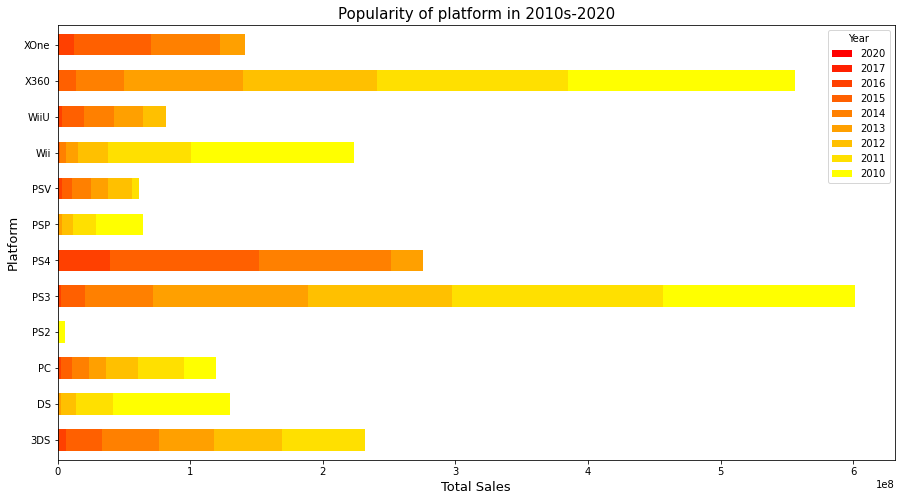

In [ ]:
ax_new = new_y_p_2010s.plot(kind='barh', stacked=True, width=0.6, colormap='autumn', figsize=(15,8))
plt.title('Popularity of platform in 2010s-2020', fontsize=15)
plt.xlabel("Total Sales", fontsize=13)
plt.ylabel("Platform", fontsize=13)
plt.show()

---
## 트렌드가 존재하므로 최근 10년의 데이터만 사용

In [ ]:
# 최근 10년의 데이터만 사용한다.
df_10 = df[pd.to_numeric(df['Year']) >= 2010]
df_10

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,total_sales
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.0,0.0,20000.0,0.0,20000.0
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,40000.0,0.0,0.0,0.0,40000.0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,120000.0,90000.0,0.0,40000.0,250000.0
6,JASF: Jane's Advanced Strike Fighters,PC,2011,Simulation,Deep Silver,20000.0,10000.0,0.0,0.0,30000.0
9,The Penguins of Madagascar: Dr. Blowhole Retur...,PS3,2011,Action,THQ,40000.0,30000.0,0.0,10000.0,80000.0
...,...,...,...,...,...,...,...,...,...,...
16225,LEGO The Hobbit,XOne,2014,Action,Warner Bros. Interactive Entertainment,130000.0,120000.0,0.0,20000.0,270000.0
16231,MindJack,PS3,2011,Shooter,Square Enix,70000.0,80000.0,0.0,30000.0,180000.0
16233,White Album: Tsuzurareru Fuyu no Omoide,PS3,2010,Adventure,Aqua Plus,0.0,0.0,50000.0,0.0,50000.0
16238,NBA 2K16,PS3,2015,Sports,Take-Two Interactive,440000.0,190000.0,30000.0,130000.0,790000.0


---

## 4.5. 타사 분석

In [ ]:
# publisher별로 groupby
#df_publisher = df.groupby('Publisher').sum()
#df_publisher

year_publisher = df[['Publisher', 'Year', 'total_sales']]
pv_year_publisher = year_publisher.pivot_table(index = 'Publisher', columns = 'Year', values = 'total_sales', aggfunc='sum')
pv_year_publisher.fillna(0, inplace=True)
pv_year_publisher

Year,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2020
Publisher,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
10TACLE Studios,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20000.0,90000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1C Company,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10000.0,0.0,90000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20th Century Fox Video Games,0.0,1350000.0,580000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2D Boy,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3DO,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,390000.0,4140000.0,3080000.0,1470000.0,610000.0,460000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
id Software,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
imageepoch Inc.,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40000.0,0.0,0.0,0.0,0.0
inXile Entertainment,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,90000.0,0.0,0.0,0.0


In [ ]:
pv_year_publisher.sum().sum()

8755370000.0

In [ ]:
# year - publisher 두 요인이 관련되어 출고량에 영향을 주는지 독립성 검정

from scipy import stats
stats.chi2_contingency(pv_year_publisher)[1]

# p-value = 0, 따라서 두 요인은 연관이 있다.

0.0

In [ ]:
# groupby publisher
df_publisher = df_10.groupby('Publisher').sum()
# sort top 10
df_publisher.sort_values(by=['total_sales'], axis=0, ascending=False).iloc[:10]
top10_pub = df_publisher.sort_values(by=['total_sales'], axis=0, ascending=False).iloc[:10].index
top10_pub

Index(['Electronic Arts', 'Activision', 'Nintendo', 'Ubisoft',
       'Take-Two Interactive', 'Microsoft Game Studios',
       'Sony Computer Entertainment', 'Warner Bros. Interactive Entertainment',
       'Namco Bandai Games', 'Square Enix'],
      dtype='object', name='Publisher')

In [ ]:
# top 5의 게임들 살펴보기
    # 1. Electronic Arts의 platform 순위
df_10[df_10['Publisher'] == 'Electronic Arts'].groupby('Platform').sum().sort_values(by=['total_sales'], axis=0, ascending=False)

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,total_sales
Platform,,,,,
PS3,41420000.0,49020000.0,2170000.0,19260000.0,111870000.0
X360,57080000.0,36130000.0,500000.0,9070000.0,102780000.0
PS4,17670000.0,27980000.0,1010000.0,8700000.0,55360000.0
PC,9110000.0,16480000.0,0.0,3990000.0,29580000.0
XOne,16500000.0,10380000.0,70000.0,2450000.0,29400000.0
Wii,7490000.0,6040000.0,20000.0,1370000.0,14920000.0
PSP,1190000.0,1710000.0,90000.0,960000.0,3950000.0
PSV,1090000.0,1890000.0,130000.0,810000.0,3920000.0
DS,1790000.0,1250000.0,0.0,310000.0,3350000.0


In [ ]:
    # 1. Electronic Arts의 Genre 순위
df_10[df_10['Publisher'] == 'Electronic Arts'].groupby('Genre').sum().sort_values(by=['total_sales'], axis=0, ascending=False)

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,total_sales
Genre,,,,,
Sports,71240000.0,72550000.0,940000.0,22930000.0,167660000.0
Shooter,38070000.0,30660000.0,1720000.0,9710000.0,80160000.0
Action,16520000.0,19890000.0,600000.0,6300000.0,43310000.0
Role-Playing,11140000.0,7550000.0,350000.0,2450000.0,21490000.0
Racing,7370000.0,10610000.0,250000.0,3170000.0,21400000.0
Simulation,6800000.0,8900000.0,50000.0,2210000.0,17960000.0
Misc,2240000.0,1340000.0,0.0,390000.0,3970000.0
Fighting,1240000.0,1090000.0,10000.0,350000.0,2690000.0
Adventure,490000.0,500000.0,80000.0,150000.0,1220000.0


In [ ]:
df_10[df_10['Publisher'] == 'Electronic Arts'].groupby('Name').sum().sort_values(by=['total_sales'], axis=0, ascending=False).iloc[:10]

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,total_sales
Name,,,,,
FIFA 15,3200000.0,12400000.0,130000.0,3290000.0,19020000.0
Battlefield 3,8200000.0,6490000.0,410000.0,2270000.0,17370000.0
FIFA 14,2840000.0,11140000.0,200000.0,2980000.0,17160000.0
FIFA 16,2980000.0,11290000.0,110000.0,2050000.0,16430000.0
FIFA Soccer 13,2640000.0,10250000.0,230000.0,3030000.0,16150000.0
Battlefield 4,6410000.0,5570000.0,460000.0,1600000.0,14040000.0
FIFA 12,2080000.0,8500000.0,150000.0,2410000.0,13140000.0
FIFA Soccer 11,1940000.0,8010000.0,90000.0,2510000.0,12550000.0
Star Wars Battlefront (2015),5000000.0,4880000.0,240000.0,1580000.0,11700000.0


In [ ]:
    # 2. Activision
df_10[df_10['Publisher'] == 'Activision'].groupby('Name').sum().sort_values(by=['total_sales'], axis=0, ascending=False).iloc[:10]

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,total_sales
Name,,,,,
Call of Duty: Modern Warfare 3,15580000.0,11290000.0,620000.0,3350000.0,30840000.0
Call of Duty: Black Ops II,14080000.0,11050000.0,720000.0,3880000.0,29730000.0
Call of Duty: Black Ops,17010000.0,8690000.0,590000.0,3120000.0,29410000.0
Call of Duty: Ghosts,14920000.0,9050000.0,480000.0,2920000.0,27370000.0
Call of Duty: Black Ops 3,11890000.0,9560000.0,430000.0,3420000.0,25300000.0
Call of Duty: Advanced Warfare,10440000.0,8180000.0,340000.0,2930000.0,21890000.0
Destiny,6590000.0,4120000.0,280000.0,1620000.0,12610000.0
Diablo III,4870000.0,4540000.0,210000.0,1440000.0,11060000.0
Skylanders SWAP Force,3530000.0,2080000.0,0.0,660000.0,6270000.0


In [ ]:
df_10[df_10['Publisher'] == 'Activision'].groupby('Platform').sum().sort_values(by=['total_sales'], axis=0, ascending=False).iloc[:10]

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,total_sales
Platform,,,,,
X360,53400000.0,23170000.0,350000.0,6940000.0,83860000.0
PS3,32620000.0,30860000.0,2620000.0,11810000.0,77910000.0
PS4,16370000.0,16410000.0,970000.0,6500000.0,40250000.0
XOne,14930000.0,6630000.0,20000.0,1930000.0,23510000.0
Wii,14420000.0,6590000.0,130000.0,1910000.0,23050000.0
PC,10540000.0,8810000.0,0.0,2440000.0,21790000.0
DS,8930000.0,2810000.0,20000.0,1090000.0,12850000.0
3DS,2950000.0,1360000.0,0.0,350000.0,4660000.0
WiiU,2480000.0,1260000.0,10000.0,360000.0,4110000.0


In [ ]:
df_10[df_10['Publisher'] == 'Activision'].groupby('Genre').sum().sort_values(by=['total_sales'], axis=0, ascending=False).iloc[:10]

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,total_sales
Genre,,,,,
Shooter,97390000.0,66820000.0,3680000.0,22930000.0,190820000.0
Action,22420000.0,13540000.0,280000.0,4340000.0,40580000.0
Role-Playing,7890000.0,5760000.0,210000.0,1720000.0,15580000.0
Misc,7830000.0,3910000.0,0.0,1330000.0,13070000.0
Strategy,4580000.0,3370000.0,0.0,1060000.0,9010000.0
Sports,6110000.0,890000.0,0.0,650000.0,7650000.0
Platform,4400000.0,2300000.0,0.0,780000.0,7480000.0
Racing,3740000.0,880000.0,20000.0,460000.0,5100000.0
Simulation,2840000.0,710000.0,0.0,320000.0,3870000.0


In [ ]:
    # 3. Nintendo
df_10[df_10['Publisher'] == 'Nintendo'].groupby('Name').sum().sort_values(by=['total_sales'], axis=0, ascending=False).iloc[:10]

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,total_sales
Name,,,,,
Pokemon Black/Pokemon White,5570000.0,3280000.0,5650000.0,820000.0,15320000.0
Super Smash Bros. for Wii U and 3DS,5830000.0,2410000.0,3220000.0,1000000.0,12460000.0
Mario Kart 7,4740000.0,3910000.0,2670000.0,890000.0,12210000.0
Pokemon Omega Ruby/Pokemon Alpha Sapphire,4230000.0,3370000.0,3080000.0,650000.0,11330000.0
Super Mario 3D Land,4890000.0,2990000.0,2130000.0,780000.0,10790000.0
New Super Mario Bros. 2,3660000.0,3070000.0,2470000.0,630000.0,9830000.0
Animal Crossing: New Leaf,2010000.0,2320000.0,4360000.0,410000.0,9100000.0
Donkey Kong Country Returns,3980000.0,2460000.0,1430000.0,590000.0,8460000.0
Pokemon Black 2/Pokemon White 2,2910000.0,1860000.0,3140000.0,430000.0,8340000.0


In [ ]:
df_10[df_10['Publisher'] == 'Nintendo']['Platform'].unique()

array(['3DS', 'DS', 'WiiU', 'Wii'], dtype=object)

In [ ]:
df_10[df_10['Publisher'] == 'Nintendo'].groupby('Platform').sum().sort_values(by=['total_sales'], axis=0, ascending=False).iloc[:10]

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,total_sales
Platform,,,,,
3DS,47560000.0,38560000.0,47890000.0,8070000.0,142080000.0
WiiU,26090000.0,16050000.0,11240000.0,4550000.0,57930000.0
Wii,18250000.0,9840000.0,9000000.0,2770000.0,39860000.0
DS,13820000.0,8840000.0,13580000.0,2140000.0,38380000.0


In [ ]:
df_10[df_10['Publisher'] == 'Nintendo'].groupby('Genre').sum().sort_values(by=['total_sales'], axis=0, ascending=False).iloc[:10]

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,total_sales
Genre,,,,,
Role-Playing,24140000.0,14910000.0,29960000.0,3490000.0,72500000.0
Platform,30420000.0,18930000.0,14390000.0,4650000.0,68390000.0
Action,15800000.0,9260000.0,7850000.0,2630000.0,35540000.0
Simulation,5690000.0,7240000.0,9290000.0,1190000.0,23410000.0
Misc,6870000.0,7150000.0,6500000.0,1410000.0,21930000.0
Racing,7870000.0,5980000.0,3940000.0,1380000.0,19170000.0
Fighting,5890000.0,2490000.0,3270000.0,1010000.0,12660000.0
Puzzle,3280000.0,2830000.0,1810000.0,610000.0,8530000.0
Sports,2410000.0,1700000.0,1750000.0,400000.0,6260000.0


In [ ]:
    # 4. Ubisoft
df_10[df_10['Publisher'] == 'Ubisoft'].groupby('Name').sum().sort_values(by=['total_sales'], axis=0, ascending=False).iloc[:10]

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,total_sales
Name,,,,,
Assassin's Creed IV: Black Flag,6170000.0,5180000.0,200000.0,1650000.0,13200000.0
Assassin's Creed III,6240000.0,4930000.0,190000.0,1740000.0,13100000.0
Just Dance 3,7850000.0,3760000.0,0.0,1320000.0,12930000.0
Just Dance 2,5840000.0,2890000.0,10000.0,780000.0,9520000.0
Watch Dogs,3800000.0,4040000.0,220000.0,1440000.0,9500000.0
Assassin's Creed: Revelations,3800000.0,3970000.0,140000.0,1290000.0,9200000.0
Just Dance 4,5520000.0,2670000.0,0.0,730000.0,8920000.0
Far Cry 4,2840000.0,4450000.0,190000.0,1180000.0,8660000.0
Assassin's Creed: Unity,3610000.0,3180000.0,80000.0,1050000.0,7920000.0


In [ ]:
    # 5. Take-Two Interactive	
df_10[df_10['Publisher'] == 'Take-Two Interactive'].groupby('Name').sum().sort_values(by=['total_sales'], axis=0, ascending=False).iloc[:10]

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,total_sales
Name,,,,,
Grand Theft Auto V,23460000.0,23040000.0,1390000.0,8030000.0,55920000.0
Red Dead Redemption,6490000.0,4580000.0,260000.0,1600000.0,12930000.0
NBA 2K16,5640000.0,1140000.0,60000.0,1170000.0,8010000.0
Borderlands 2,3790000.0,2300000.0,150000.0,900000.0,7140000.0
NBA 2K15,5010000.0,1130000.0,30000.0,890000.0,7060000.0
NBA 2K14,5120000.0,950000.0,50000.0,600000.0,6720000.0
NBA 2K13,4790000.0,740000.0,60000.0,500000.0,6090000.0
L.A. Noire,2790000.0,2270000.0,140000.0,750000.0,5950000.0
NBA 2K12,4530000.0,520000.0,60000.0,410000.0,5520000.0


In [ ]:
    # 6. Microsoft Game Studios	
df_10[df_10['Publisher'] == 'Microsoft Game Studios'].groupby('Name').sum().sort_values(by=['total_sales'], axis=0, ascending=False).iloc[:10]

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,total_sales
Name,,,,,
Kinect Adventures!,14970000.0,4940000.0,240000.0,1670000.0,21820000.0
Minecraft,7190000.0,3680000.0,160000.0,1020000.0,12050000.0
Halo: Reach,7030000.0,1980000.0,80000.0,780000.0,9870000.0
Halo 4,6630000.0,2360000.0,40000.0,730000.0,9760000.0
Kinect Sports,3920000.0,1780000.0,30000.0,510000.0,6240000.0
Gears of War 3,4050000.0,1620000.0,70000.0,490000.0,6230000.0
Fable III,3680000.0,1280000.0,50000.0,430000.0,5440000.0
Forza Motorsport 4,2080000.0,2040000.0,60000.0,470000.0,4650000.0
Halo 5: Guardians,2640000.0,1200000.0,30000.0,390000.0,4260000.0


In [ ]:
# 7. Sony Computer Entertainment
df_10[df_10['Publisher'] == 'Sony Computer Entertainment'].groupby('Name').sum().sort_values(by=['total_sales'], axis=0, ascending=False).iloc[:10]

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,total_sales
Name,,,,,
Gran Turismo 5,2960000.0,4880000.0,810000.0,2120000.0,10770000.0
Uncharted 3: Drake's Deception,2770000.0,2800000.0,190000.0,1060000.0,6820000.0
God of War III,2970000.0,1650000.0,130000.0,730000.0,5480000.0
Minecraft,1970000.0,2510000.0,0.0,940000.0,5420000.0
The Last of Us,1780000.0,1870000.0,70000.0,820000.0,4540000.0
Uncharted: The Nathan Drake Collection,1960000.0,1690000.0,80000.0,740000.0,4470000.0
Uncharted 4: A Thief's End,1300000.0,2070000.0,180000.0,650000.0,4200000.0
Sports Champions,2120000.0,1140000.0,100000.0,510000.0,3870000.0
Gran Turismo 6,710000.0,1800000.0,400000.0,740000.0,3650000.0


In [ ]:
# df_10에서 top 10을 제외한 df
is_not_top1 = df_10['Publisher'] != top10_pub[0]
df_10_except_top_pub = df_10[is_not_top1]

is_not_top2 = df_10_except_top_pub['Publisher'] != top10_pub[1]
df_10_except_top_pub = df_10_except_top_pub[is_not_top2]

is_not_top3 = df_10_except_top_pub['Publisher'] != top10_pub[2]
df_10_except_top_pub = df_10_except_top_pub[is_not_top3]

is_not_top4 = df_10_except_top_pub['Publisher'] != top10_pub[3]
df_10_except_top_pub = df_10_except_top_pub[is_not_top4]

is_not_top5 = df_10_except_top_pub['Publisher'] != top10_pub[4]
df_10_except_top_pub = df_10_except_top_pub[is_not_top5]

is_not_top6 = df_10_except_top_pub['Publisher'] != top10_pub[5]
df_10_except_top_pub = df_10_except_top_pub[is_not_top6]

is_not_top7 = df_10_except_top_pub['Publisher'] != top10_pub[6]
df_10_except_top_pub = df_10_except_top_pub[is_not_top7]

is_not_top8 = df_10_except_top_pub['Publisher'] != top10_pub[7]
df_10_except_top_pub = df_10_except_top_pub[is_not_top8]

is_not_top9 = df_10_except_top_pub['Publisher'] != top10_pub[8]
df_10_except_top_pub = df_10_except_top_pub[is_not_top9]

is_not_top10 = df_10_except_top_pub['Publisher'] != top10_pub[9]
df_10_except_top_pub = df_10_except_top_pub[is_not_top10]


df_10_except_top_pub['Publisher'].unique()
#df_10_except_top_pub.sort_values(by=['total_sales'], axis=0, ascending=False)[:10]

array(['Alchemist', 'Zoo Games', 'D3Publisher', 'Deep Silver', 'THQ',
       'Nippon Ichi Software', 'Tru Blu Entertainment', 'Wargaming.net',
       'Unknown', 'Capcom', 'Milestone S.r.l', 'Kamui',
       'Focus Home Interactive', '505 Games', 'Crave Entertainment',
       'Disney Interactive Studios', 'Storm City Games', 'Tecmo Koei',
       'Sega', 'Giza10', 'Konami Digital Entertainment', '5pb',
       'Foreign Media Games', 'Nippon Columbia', 'Bethesda Softworks',
       'Ignition Entertainment', 'ASCII Media Works', 'Easy Interactive',
       'Idea Factory', 'ArtDink', 'System Soft', 'Kaga Create',
       'Quinrose', 'Headup Games', 'TGL', 'Little Orbit', 'Avanquest',
       'Marvelous Entertainment', 'Comfort', 'Compile Heart', 'Atari',
       'Russel', 'FuRyu', 'dramatic create', 'Destineer', 'Koch Media',
       'Mindscape', 'Codemasters', 'FuRyu Corporation', 'Office Create',
       'Takara Tomy', 'Asylum Entertainment', 'Taito', 'Rocket Company',
       'Atlus', 'Telltale Ga

In [ ]:
df_10_except_top_pub.sort_values(by=['total_sales'], axis=0, ascending=False)[:10]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,total_sales
11283,The Elder Scrolls V: Skyrim,X360,2011,Role-Playing,Bethesda Softworks,5030000.0,2860000.0,100000.0,850000.0,8840000.0
11065,Fallout 4,PS4,2015,Role-Playing,Bethesda Softworks,2470000.0,3150000.0,240000.0,1100000.0,6960000.0
14471,Zumba Fitness,Wii,2010,Sports,505 Games,3500000.0,2640000.0,0.0,670000.0,6810000.0
5978,The Elder Scrolls V: Skyrim,PS3,2011,Role-Playing,Bethesda Softworks,2550000.0,2710000.0,250000.0,1050000.0,6560000.0
7921,The Last of Us,PS3,2013,Action,Sony Computer Entertainment Europe,2410000.0,2280000.0,280000.0,1010000.0,5980000.0
1817,Monster Hunter Freedom 3,PSP,2010,Role-Playing,Capcom,0.0,0.0,4870000.0,0.0,4870000.0
15937,Fallout 4,XOne,2015,Role-Playing,Bethesda Softworks,2450000.0,1260000.0,10000.0,370000.0,4090000.0
2815,Fallout: New Vegas,X360,2010,Role-Playing,Bethesda Softworks,2650000.0,1060000.0,40000.0,330000.0,4080000.0
12880,Minecraft,PS4,2014,Misc,Sony Computer Entertainment Europe,1380000.0,1870000.0,120000.0,650000.0,4020000.0
1610,The Elder Scrolls V: Skyrim,PC,2011,Role-Playing,Bethesda Softworks,1150000.0,2090000.0,0.0,640000.0,3880000.0


In [ ]:
df_10_except_top_pub.groupby('Platform').sum().sort_values(by=['total_sales'], axis=0, ascending=False)

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,total_sales
Platform,,,,,
PS3,51290000.0,50940000.0,30170000.0,20320000.0,152720000.0
X360,65990000.0,38720000.0,2670000.0,10080000.0,117460000.0
Wii,44560000.0,22040000.0,1790000.0,6220000.0,74610000.0
PS4,16470000.0,23420000.0,6100000.0,7870000.0,53860000.0
DS,28150000.0,12960000.0,7870000.0,3670000.0,52650000.0
3DS,12710000.0,7500000.0,30010000.0,1840000.0,52060000.0
PC,8730000.0,24210000.0,0.0,5340000.0,38280000.0
PSP,3760000.0,3120000.0,29220000.0,1850000.0,37950000.0
PSV,6310000.0,5140000.0,13330000.0,3190000.0,27970000.0


In [ ]:
df_10_except_top_pub.groupby('Genre').sum().sort_values(by=['total_sales'], axis=0, ascending=False)

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,total_sales
Genre,,,,,
Action,76420000.0,58290000.0,40370000.0,19080000.0,194160000.0
Role-Playing,34200000.0,23290000.0,36550000.0,8650000.0,102690000.0
Sports,21210000.0,24070000.0,10790000.0,6880000.0,62950000.0
Misc,29950000.0,13150000.0,7670000.0,4750000.0,55520000.0
Shooter,23420000.0,21560000.0,3430000.0,6850000.0,55260000.0
Racing,12550000.0,18160000.0,690000.0,4900000.0,36300000.0
Adventure,10020000.0,9320000.0,11810000.0,2810000.0,33960000.0
Fighting,13880000.0,7240000.0,4040000.0,2950000.0,28110000.0
Platform,11990000.0,7810000.0,1060000.0,2310000.0,23170000.0


## 4.6. game ranking

In [ ]:
ranking_df = df_10.groupby('Name').sum().sort_values(by=['total_sales'], ascending=False)[:20]
ranking_df.drop('total_sales',axis=1,inplace=True)
ranking_df

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Name,,,,
Grand Theft Auto V,23460000.0,23040000.0,1390000.0,8030000.0
Call of Duty: Modern Warfare 3,15580000.0,11290000.0,620000.0,3350000.0
Call of Duty: Black Ops II,14080000.0,11050000.0,720000.0,3880000.0
Call of Duty: Black Ops,17010000.0,8690000.0,590000.0,3120000.0
Call of Duty: Ghosts,14920000.0,9050000.0,480000.0,2920000.0
Call of Duty: Black Ops 3,11890000.0,9560000.0,430000.0,3420000.0
Minecraft,10820000.0,8850000.0,1150000.0,2930000.0
Call of Duty: Advanced Warfare,10440000.0,8180000.0,340000.0,2930000.0
Kinect Adventures!,14970000.0,4940000.0,240000.0,1670000.0


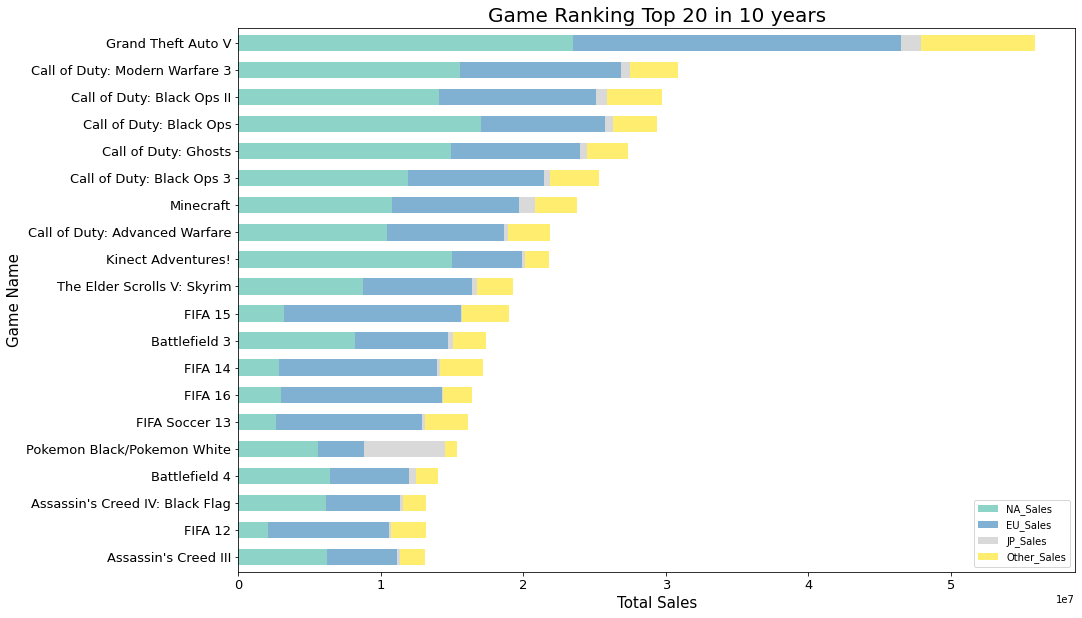

In [ ]:
rank_plt_df = ranking_df[::-1]
ax_new2 = rank_plt_df.plot(kind='barh', stacked=True, width=0.6, colormap='Set3', figsize=(15,10))
plt.title('Game Ranking Top 20 in 10 years', fontsize=20)
plt.xlabel("Total Sales", fontsize=15)
plt.ylabel("Game Name", fontsize=15)
plt.xticks(fontsize =13)
plt.yticks(fontsize =13)
plt.show()

In [ ]:
# 최근 10년 Action 장르 출고량
df_10_action = df_10[df_10['Genre'] == 'Action']
action_sales_10 = df_10_action['total_sales'].sum()
action_sales_10

669600000.0

In [ ]:
# Grand Theft Auto V의 출고량
GTA5_sales_10 = ranking_df[ranking_df.index == 'Grand Theft Auto V'].values.sum()
GTA5_sales_10

55920000.0

In [ ]:
# GTA 시리즈
df_10[df_10['Name'].str.contains('Grand Theft Auto')].groupby('Name').sum()

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,total_sales
Name,,,,,
Grand Theft Auto V,23460000.0,23040000.0,1390000.0,8030000.0,55920000.0


In [ ]:
ratio_1 = (GTA5_sales_10 / action_sales_10)*100 
print("최근 10년 Action장르 중 GTA5 출고량 비율: ", ratio_1 , "%")

최근 10년 Action장르 중 GTA5 출고량 비율:  8.351254480286737 %


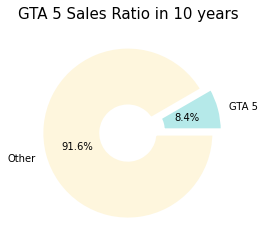

In [ ]:
# 시각화
import matplotlib.pyplot as plt

ratio = [ratio_1, 100-ratio_1]
labels = ['GTA 5', 'Other']
colors = ['#B5E9E9', '#FEF6DD']
explode = [0.1, 0]
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}

plt.pie(ratio, labels=labels, autopct='%.1f%%', colors=colors, explode=explode, wedgeprops=wedgeprops)

plt.title ("GTA 5 Sales Ratio in 10 years", fontsize=15)
plt.show()

In [ ]:
# 게임 분석

df_10[df_10['Name'] == "Grand Theft Auto V"]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,total_sales
1973,Grand Theft Auto V,PS4,2014,Action,Take-Two Interactive,3800000.0,5810000.0,360000.0,2020000.0,11990000.0
3414,Grand Theft Auto V,PS3,2013,Action,Take-Two Interactive,7010000.0,9270000.0,970000.0,4140000.0,21390000.0
10619,Grand Theft Auto V,XOne,2014,Action,Take-Two Interactive,2660000.0,2010000.0,0.0,410000.0,5080000.0
10695,Grand Theft Auto V,X360,2013,Action,Take-Two Interactive,9630000.0,5310000.0,60000.0,1380000.0,16380000.0
16219,Grand Theft Auto V,PC,2015,Action,Take-Two Interactive,360000.0,640000.0,0.0,80000.0,1080000.0


In [ ]:
df_10[df_10['Name'].str.contains('Call of Duty')].sort_values(by='total_sales', ascending=False)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,total_sales
2757,Call of Duty: Modern Warfare 3,X360,2011,Shooter,Activision,9030000.0,4280000.0,130000.0,1320000.0,14760000.0
6119,Call of Duty: Black Ops,X360,2010,Shooter,Activision,9670000.0,3730000.0,110000.0,1130000.0,14640000.0
8892,Call of Duty: Black Ops 3,PS4,2015,Shooter,Activision,5770000.0,5810000.0,350000.0,2310000.0,14240000.0
4152,Call of Duty: Black Ops II,PS3,2012,Shooter,Activision,4990000.0,5880000.0,650000.0,2520000.0,14040000.0
6257,Call of Duty: Black Ops II,X360,2012,Shooter,Activision,8250000.0,4300000.0,70000.0,1120000.0,13740000.0
13814,Call of Duty: Modern Warfare 3,PS3,2011,Shooter,Activision,5540000.0,5820000.0,490000.0,1620000.0,13470000.0
9733,Call of Duty: Black Ops,PS3,2010,Shooter,Activision,5980000.0,4440000.0,480000.0,1830000.0,12730000.0
5489,Call of Duty: Ghosts,X360,2013,Shooter,Activision,6720000.0,2630000.0,40000.0,820000.0,10210000.0
6740,Call of Duty: Ghosts,PS3,2013,Shooter,Activision,4090000.0,3730000.0,380000.0,1380000.0,9580000.0
6998,Call of Duty: Advanced Warfare,PS4,2014,Shooter,Activision,2800000.0,3300000.0,140000.0,1370000.0,7610000.0


In [ ]:
df_10[df_10['Name'] == "Minecraft"]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,total_sales
6335,Minecraft,WiiU,2016,Misc,Microsoft Game Studios,180000.0,90000.0,140000.0,30000.0,440000.0
9802,Minecraft,X360,2013,Misc,Microsoft Game Studios,5580000.0,2830000.0,20000.0,770000.0,9200000.0
12816,Minecraft,PSV,2014,Misc,Sony Computer Entertainment Europe,280000.0,790000.0,870000.0,320000.0,2260000.0
12880,Minecraft,PS4,2014,Misc,Sony Computer Entertainment Europe,1380000.0,1870000.0,120000.0,650000.0,4020000.0
13700,Minecraft,XOne,2014,Misc,Microsoft Game Studios,1430000.0,760000.0,0.0,220000.0,2410000.0
16148,Minecraft,PS3,2014,Misc,Sony Computer Entertainment,1970000.0,2510000.0,0.0,940000.0,5420000.0


In [ ]:
df_10[df_10['Name'].str.contains('FIFA')].sort_values(by='Name')

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,total_sales
7419,2010 FIFA World Cup South Africa,X360,2010,Sports,Electronic Arts,320000.0,430000.0,20000.0,90000.0,860000.0
14376,2010 FIFA World Cup South Africa,Wii,2010,Sports,Electronic Arts,230000.0,150000.0,10000.0,40000.0,430000.0
7396,2010 FIFA World Cup South Africa,PSP,2010,Sports,Electronic Arts,90000.0,240000.0,30000.0,120000.0,480000.0
14890,2010 FIFA World Cup South Africa,PS3,2010,Sports,Electronic Arts,300000.0,640000.0,70000.0,220000.0,1230000.0
7999,2014 FIFA World Cup Brazil,X360,2014,Sports,Electronic Arts,140000.0,280000.0,0.0,40000.0,460000.0
5767,2014 FIFA World Cup Brazil,PS3,2014,Sports,Electronic Arts,150000.0,390000.0,10000.0,160000.0,710000.0
10111,FIFA 12,PC,2011,Sports,Electronic Arts,40000.0,330000.0,0.0,100000.0,470000.0
13203,FIFA 12,PS3,2011,Sports,Electronic Arts,840000.0,4320000.0,110000.0,1420000.0,6690000.0
15907,FIFA 12,PSP,2011,Sports,Electronic Arts,120000.0,260000.0,20000.0,140000.0,540000.0
8633,FIFA 12,Wii,2011,Sports,Electronic Arts,160000.0,520000.0,0.0,110000.0,790000.0


In [ ]:
df_10[df_10['Name'].str.contains('Pokemon Black/Pokemon White')].sort_values(by='Name')

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,total_sales
10410,Pokemon Black/Pokemon White,DS,2010,Role-Playing,Nintendo,5570000.0,3280000.0,5650000.0,820000.0,15320000.0


In [ ]:
# JP rank
df_10_JP = df_10.sort_values(by=['JP_Sales'], ascending=False).iloc[:20].drop(['NA_Sales','EU_Sales','Other_Sales'],axis=1)
sum_global = df_10_JP['total_sales'].sum()
sum_japan = df_10_JP['JP_Sales'].sum()

ratio_2 = (sum_japan / sum_global)*100

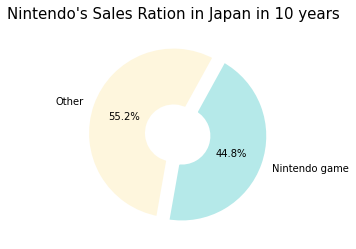

In [ ]:
# 시각화
import matplotlib.pyplot as plt

ratio__2 = [ratio_2, 100-ratio_2]
labels_2 = ['Nintendo game', 'Other']
colors = ['#B5E9E9', '#FEF6DD']
explode = [0.1, 0]
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}

#plt.figure(figsize=(6,6))
plt.pie(ratio__2, labels=labels_2, autopct='%.1f%%', colors=colors, explode=explode, wedgeprops=wedgeprops, startangle=260)

plt.title ("Nintendo's Sales Ration in Japan in 10 years", fontsize=15)
plt.show()

In [ ]:
# Action 게임 분석

In [ ]:
df_5 = df[pd.to_numeric(df['Year']) >= 2014]
df_5_action = df_5[df_5['Genre'] == 'Action']

In [ ]:
df_5_action['Platform'].value_counts()

PS4     119
PSV     103
3DS      80
PS3      75
XOne     64
X360     36
WiiU     34
PC       34
PSP       6
Wii       6
DS        1
Name: Platform, dtype: int64

## 4.7. t-test, ANOVA

In [ ]:
df_10

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,total_sales
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.0,0.0,20000.0,0.0,20000.0
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,40000.0,0.0,0.0,0.0,40000.0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,120000.0,90000.0,0.0,40000.0,250000.0
6,JASF: Jane's Advanced Strike Fighters,PC,2011,Simulation,Deep Silver,20000.0,10000.0,0.0,0.0,30000.0
9,The Penguins of Madagascar: Dr. Blowhole Retur...,PS3,2011,Action,THQ,40000.0,30000.0,0.0,10000.0,80000.0
...,...,...,...,...,...,...,...,...,...,...
16225,LEGO The Hobbit,XOne,2014,Action,Warner Bros. Interactive Entertainment,130000.0,120000.0,0.0,20000.0,270000.0
16231,MindJack,PS3,2011,Shooter,Square Enix,70000.0,80000.0,0.0,30000.0,180000.0
16233,White Album: Tsuzurareru Fuyu no Omoide,PS3,2010,Adventure,Aqua Plus,0.0,0.0,50000.0,0.0,50000.0
16238,NBA 2K16,PS3,2015,Sports,Take-Two Interactive,440000.0,190000.0,30000.0,130000.0,790000.0


### 2.7.1. "Action"의 출고량이 "Shooter"게임의 출고량보다 많다고 할 수 있는가? (독립표본 t-test)

In [ ]:
actions_10_df = df_10[df_10['Genre'] == "Action"].groupby('Name').sum()
shooters_10_df = df_10[df_10['Genre'] == "Shooter"].groupby('Name').sum()

In [ ]:
actions_10_df

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,total_sales
Name,,,,,
.hack: Sekai no Mukou ni + Versus,0.0,0.0,30000.0,0.0,30000.0
1001 Touch Games,120000.0,170000.0,0.0,40000.0,330000.0
3rd Super Robot Wars Z: Tengoku-Hen,0.0,0.0,340000.0,0.0,340000.0
7 Days to Die,50000.0,90000.0,0.0,20000.0,160000.0
A Good Librarian Like a Good Shepherd: Library Party,0.0,0.0,30000.0,0.0,30000.0
...,...,...,...,...,...
ZombiU,530000.0,400000.0,60000.0,90000.0,1080000.0
Zyuden Sentai Kyoryuger: Game de Gaburincho!!,0.0,0.0,50000.0,0.0,50000.0
[Prototype 2],910000.0,550000.0,0.0,190000.0,1650000.0


In [ ]:
shooters_10_df

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,total_sales
Name,,,,,
Akai Katana Shin,40000.0,0.0,10000.0,0.0,50000.0
Alien Breed Trilogy,0.0,20000.0,0.0,0.0,20000.0
Alien: Isolation,830000.0,1250000.0,40000.0,340000.0,2460000.0
Aliens vs Predator,960000.0,1040000.0,0.0,310000.0,2310000.0
Aliens: Colonial Marines,660000.0,740000.0,0.0,220000.0,1620000.0
...,...,...,...,...,...
Wild West Shootout,10000.0,10000.0,0.0,0.0,20000.0
Wolfenstein: The New Order,1240000.0,1810000.0,50000.0,530000.0,3630000.0
World of Tanks,0.0,230000.0,0.0,60000.0,290000.0


In [ ]:
actions_10_df.sum() > shooters_10_df.sum()

NA_Sales       True
EU_Sales       True
JP_Sales       True
Other_Sales    True
total_sales    True
dtype: bool

In [ ]:
from scipy import stats
stats.ttest_ind(actions_10_df['total_sales'], shooters_10_df['total_sales'], alternative='greater')

Ttest_indResult(statistic=-5.904930085262223, pvalue=0.9999999975534419)

In [ ]:
stats.ttest_ind(actions_10_df['total_sales'], shooters_10_df['total_sales'], alternative='less')

Ttest_indResult(statistic=-5.904930085262223, pvalue=2.446558105164389e-09)

no... 총 출고량은 Action이 많지만 게임당 평균 출고량은 shooter가 더 많다.

In [ ]:
df_10[df_10['Genre']=='Shooter'].groupby('Name').sum().sort_values(by='total_sales', ascending=False).index

Index(['Call of Duty: Modern Warfare 3', 'Call of Duty: Black Ops II',
       'Call of Duty: Black Ops', 'Call of Duty: Ghosts',
       'Call of Duty: Black Ops 3', 'Call of Duty: Advanced Warfare',
       'Battlefield 3', 'Battlefield 4', 'Destiny',
       'Star Wars Battlefront (2015)',
       ...
       'Veggy World', 'Heavy Fire: The Chosen Few 3D',
       'DoDonPachi Daifukkatsu: Black Label', 'Assault Suit Leynos',
       'Caladrius', 'Breach', 'Touhou Genso Rondo: Bullet Ballet',
       'Bullet Soul: Tama Tamashii', 'DoDonPachi Saidaioujou',
       'Resistance Dual Pack'],
      dtype='object', name='Name', length=188)

In [ ]:
# call of duty 시리즈 총 출고량
COD_sales = df_10[df_10['Name'].str.contains('Call of Duty')].sort_values(by='total_sales', ascending=False)['total_sales'].sum()

# Shooter 총 출고량
shooters_sales = shooters_10_df['total_sales'].sum()

# call of duty 시리즈의 출고량 비율
ratio_3 = COD_sales/shooters_sales * 100

In [ ]:
COD_sales

166610000.0

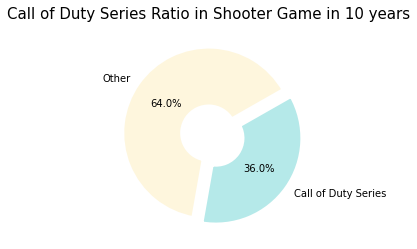

In [ ]:
# 시각화
import matplotlib.pyplot as plt

ratio__3 = [ratio_3, 100-ratio_3]
labels_3 = ['Call of Duty Series', 'Other']
colors = ['#B5E9E9', '#FEF6DD']
explode = [0.1, 0]
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}

plt.pie(ratio__3, labels=labels_3, autopct='%.1f%%', colors=colors, explode=explode, wedgeprops=wedgeprops, startangle=260)

plt.title ("Call of Duty Series Ratio in Shooter Game in 10 years", fontsize=15)
plt.show()

In [ ]:
df_10[df_10['Genre']=='Action'].groupby('Name').sum().sort_values(by='total_sales', ascending=False).index

Index(['Grand Theft Auto V', 'FIFA Soccer 13',
       'Assassin's Creed IV: Black Flag', 'Assassin's Creed III',
       'Red Dead Redemption', 'Batman: Arkham City', 'The Last of Us',
       'LEGO Marvel Super Heroes', 'Watch Dogs',
       'Assassin's Creed: Revelations',
       ...
       'Hyakka Yakou', 'Tsukigime Ranko's Longest Day',
       'Tsuyo Kiss 3 Portable', 'Collar x Malice',
       'Horse Life 4: My Horse, My Friend, My Champion',
       'Miyako: Awayuki no Utage', 'Coven and Labyrinth of Refrain',
       'Hakuoki: Reimeiroku DS', 'Unending Bloody Call',
       'Shinobi, Koi Utsutsu: Setsugetsuka Koi Emaki'],
      dtype='object', name='Name', length=773)

### 2.7.2. 최근 10년간 미국의 게임당 평균 출고량이 유럽보다 많다고 할 수 있는가? (대응표본 t-test)

In [ ]:
df_10_name = df_10.groupby('Name').sum()
df_10_name

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,total_sales
Name,,,,,
.hack//Link,0.0,0.0,140000.0,0.0,140000.0
.hack: Sekai no Mukou ni + Versus,0.0,0.0,30000.0,0.0,30000.0
1/2 Summer +,0.0,0.0,10000.0,0.0,10000.0
10 Minute Solution,60000.0,10000.0,0.0,10000.0,80000.0
100 Classic Games,0.0,30000.0,0.0,0.0,30000.0
...,...,...,...,...,...
thinkSMART,90000.0,0.0,0.0,10000.0,100000.0
thinkSMART FAMILY!,30000.0,0.0,0.0,0.0,30000.0
thinkSMART: Chess for Kids,10000.0,0.0,0.0,0.0,10000.0


In [ ]:
from scipy import stats

stats.ttest_rel(df_10_name['NA_Sales'], df_10_name['EU_Sales'], alternative='greater')

Ttest_relResult(statistic=7.699301543000614, pvalue=9.060773905808657e-15)

Reject $H_0$

### 2.7.3.  "PS3"과 "PS4" 플랫폼의 평균 게임 출고량이  "XOne"과 "X360" 보다 많다고 할 수 있는가? (독립표본 t-test)

In [ ]:
is_PS3 = df_10['Platform'] == "PS3"
is_PS4 = df_10['Platform'] == "PS4"
df_PS_series = df_10[is_PS3 | is_PS4].groupby('Name').sum()

is_XOne = df_10['Platform'] == "XOne"
is_X360 = df_10['Platform'] == "X360"
df_X_series = df_10[is_XOne | is_X360].groupby('Name').sum()

In [ ]:
df_PS_series

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,total_sales
Name,,,,,
.hack: Sekai no Mukou ni + Versus,0.0,0.0,30000.0,0.0,30000.0
2010 FIFA World Cup South Africa,300000.0,640000.0,70000.0,220000.0,1230000.0
2014 FIFA World Cup Brazil,150000.0,390000.0,10000.0,160000.0,710000.0
3rd Super Robot Wars Z Jigoku Hen,0.0,0.0,230000.0,0.0,230000.0
3rd Super Robot Wars Z: Tengoku-Hen,0.0,0.0,150000.0,0.0,150000.0
...,...,...,...,...,...
de Blob 2,110000.0,70000.0,0.0,30000.0,210000.0
inFAMOUS 2,1050000.0,490000.0,80000.0,230000.0,1850000.0
inFAMOUS: Second Son,1270000.0,970000.0,70000.0,470000.0,2780000.0


In [ ]:
df_X_series

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,total_sales
Name,,,,,
2 in 1 Combo Pack: Sonic Heroes / Super Monkey Ball Deluxe,90000.0,10000.0,0.0,10000.0,110000.0
2010 FIFA World Cup South Africa,320000.0,430000.0,20000.0,90000.0,860000.0
2014 FIFA World Cup Brazil,140000.0,280000.0,0.0,40000.0,460000.0
7 Days to Die,20000.0,20000.0,0.0,0.0,40000.0
Ace Combat: Assault Horizon,300000.0,120000.0,30000.0,40000.0,490000.0
...,...,...,...,...,...
[Prototype 2],480000.0,250000.0,0.0,70000.0,800000.0
de Blob 2,100000.0,40000.0,0.0,10000.0,150000.0
nail'd,80000.0,20000.0,0.0,10000.0,110000.0


In [ ]:
from scipy import stats

stats.ttest_ind(df_PS_series['total_sales'], df_X_series['total_sales'], alternative='greater')

Ttest_indResult(statistic=-0.5725379347071787, pvalue=0.7164860761396366)

In [ ]:
stats.ttest_ind(df_PS_series['total_sales'], df_X_series['total_sales'])

Ttest_indResult(statistic=-0.5725379347071787, pvalue=0.5670278477207271)

유의한 차이가 있다고 보기는 어렵다...

### 2.7.4.  각 시리즈의 최신 플랫폼끼리 차이가 있다고 할 수 있는가? (ANOVA test)

In [ ]:
is_3DS = df_10['Platform'] == "3DS"

df_PS4 = df_10[is_PS4]
df_XOne = df_10[is_XOne]
df_3DS = df_10[is_3DS]

In [ ]:
df_PS4

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,total_sales
18,Grand Kingdom,PS4,2015,Role-Playing,Nippon Ichi Software,20000.0,0.0,30000.0,0.0,50000.0
54,Sébastien Loeb Rally Evo,PS4,2016,Racing,Milestone S.r.l,0.0,40000.0,0.0,10000.0,50000.0
66,Sherlock Holmes: Crimes & Punishments,PS4,2014,Adventure,Focus Home Interactive,80000.0,140000.0,0.0,50000.0,270000.0
114,Jikkyou Powerful Pro Baseball 2016,PS4,2016,Sports,Konami Digital Entertainment,0.0,0.0,170000.0,0.0,170000.0
129,Rabbids Invasion: The Interactive TV Show,PS4,2014,Misc,Ubisoft,0.0,10000.0,0.0,0.0,10000.0
...,...,...,...,...,...,...,...,...,...,...
16017,NHL 17,PS4,2016,Sports,Electronic Arts,130000.0,40000.0,0.0,40000.0,210000.0
16084,Far Cry: Primal,PS4,2016,Action,Ubisoft,590000.0,1160000.0,60000.0,330000.0,2140000.0
16193,Dead or Alive 5,PS4,2015,Fighting,Tecmo Koei,90000.0,130000.0,80000.0,40000.0,340000.0
16215,Koihime Enbu,PS4,2016,Fighting,Yeti,0.0,0.0,20000.0,0.0,20000.0


In [ ]:
df_XOne

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,total_sales
70,Payday 2,XOne,2015,Shooter,505 Games,80000.0,70000.0,0.0,10000.0,160000.0
306,The Crew,XOne,2014,Racing,Ubisoft,240000.0,340000.0,0.0,50000.0,630000.0
360,Mad Max (2015),XOne,2015,Action,Warner Bros. Interactive Entertainment,260000.0,160000.0,0.0,40000.0,460000.0
440,WWE 2K15,XOne,2014,Sports,Take-Two Interactive,280000.0,230000.0,0.0,40000.0,550000.0
448,FIFA 14,XOne,2013,Sports,Electronic Arts,410000.0,660000.0,0.0,120000.0,1190000.0
...,...,...,...,...,...,...,...,...,...,...
16034,Deus Ex: Mankind Divided,XOne,2016,Role-Playing,Square Enix,80000.0,60000.0,0.0,10000.0,150000.0
16050,The Golf Club,XOne,2014,Sports,Unknown,20000.0,0.0,0.0,0.0,20000.0
16069,NHL 15,XOne,2014,Sports,Electronic Arts,310000.0,60000.0,0.0,30000.0,400000.0
16202,7 Days to Die,XOne,2016,Action,Telltale Games,20000.0,20000.0,0.0,0.0,40000.0


In [ ]:
df_3DS

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,total_sales
32,Mario & Luigi: Paper Jam & Mario Kart 7 Double...,3DS,2015,Misc,Nintendo,0.0,0.0,10000.0,0.0,10000.0
98,Samurai Warriors Chronicles 3,3DS,2014,Action,Tecmo Koei,0.0,0.0,80000.0,0.0,80000.0
138,Sumikko Gurashi: Koko ga Ochitsukundesu,3DS,2014,Action,Nippon Columbia,0.0,0.0,170000.0,0.0,170000.0
149,Style Savvy: Trendsetters,3DS,2012,Simulation,Nintendo,160000.0,20000.0,530000.0,10000.0,720000.0
238,Code Name: S.T.E.A.M.,3DS,2015,Strategy,Nintendo,140000.0,50000.0,10000.0,20000.0,220000.0
...,...,...,...,...,...,...,...,...,...,...
16049,Combat of Giants: Dinosaurs 3D,3DS,2011,Strategy,Ubisoft,250000.0,60000.0,50000.0,30000.0,390000.0
16059,Barbie and Her Sisters Puppy Rescue,3DS,2015,Action,Namco Bandai Games,0.0,30000.0,0.0,0.0,30000.0
16164,Pro Yakyuu Famista 2011,3DS,2011,Sports,Namco Bandai Games,0.0,0.0,60000.0,0.0,60000.0
16168,Gotouchi Tetsudou: Gotouchi Chara to Nihon Zen...,3DS,2014,Misc,Namco Bandai Games,0.0,0.0,120000.0,0.0,120000.0


In [ ]:
import scipy.stats as stats

fvalue, pvalue = stats.f_oneway(df_PS4['total_sales'], df_XOne['total_sales'], df_3DS['total_sales'])
fvalue, pvalue

(7.200586131417353, 0.0007838590659772107)

In [ ]:
from scipy import stats

stats.ttest_ind(df_PS4['total_sales'], df_XOne['total_sales'], alternative='greater')

Ttest_indResult(statistic=1.2625949545240382, pvalue=0.10363737313882819)

In [ ]:
stats.ttest_ind(df_PS4['total_sales'], df_XOne['total_sales'])

Ttest_indResult(statistic=1.2625949545240382, pvalue=0.20727474627765638)

In [ ]:
stats.ttest_ind(df_3DS['total_sales'], df_PS4['total_sales'], alternative='less')

Ttest_indResult(statistic=-3.577005562871634, pvalue=0.0001838240627807779)

In [ ]:
stats.ttest_ind(df_3DS['total_sales'], df_XOne['total_sales'], alternative='less')

Ttest_indResult(statistic=-2.0350155224745987, pvalue=0.021110662860734136)

p-value가 $\alpha = 0.05$보다 크므로 not reject H0지만,

최신 데이터가 더 모이면 추가분석을 진행해보는 것이 좋겠다.